<a href="https://colab.research.google.com/github/lrsonly/lrs_files/blob/main/gradient_generate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step1
获取图片信息

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import json
json_data = json.load(open('/content/drive/MyDrive/ISBI_detection/isbi_train_v3.json'))
# json_data = json.load(open('/content/drive/MyDrive/Chromosome/chromosome_train.json'))

In [8]:
import numpy as np
import matplotlib.path as mplPath
import matplotlib.patches as patches
#获取第一张图片信息为例
this_image_id = json_data['annotations'][0]['image_id']
this_image_name = json_data['images'][this_image_id]['file_name']
print(this_image_name)

mask1 = np.zeros((512, 512))

mask1_coordinates = np.array(json_data['annotations'][0]['segmentation']).reshape(-1, 2)
mask1_path = mplPath.Path(mask1_coordinates)
y, x = np.mgrid[:512, :512]
mask1[mask1_path.contains_points(np.vstack((x.flatten(), y.flatten())).T).reshape(512, 512)] = 1

rgba_mask1 = np.zeros((512, 512, 4))
rgba_mask1[..., 3] = mask1 # 将不透明的第4通道设为mask区域
rgba_mask1[..., 0] = mask1 # 将红色通道换成mask区域


mask2 = np.zeros((512, 512))

mask2_coordinates = np.array(json_data['annotations'][1]['segmentation']).reshape(-1, 2)
mask2_path = mplPath.Path(mask2_coordinates)
y, x = np.mgrid[:512, :512]
mask2[mask2_path.contains_points(np.vstack((x.flatten(), y.flatten())).T).reshape(512, 512)] = 1

rgba_mask2 = np.zeros((512, 512, 4))
rgba_mask2[..., 3] = mask2 # 将不透明的第4通道设为mask区域
rgba_mask2[..., 0] = mask2 # 将红色通道换成mask区域

isbi_0.png


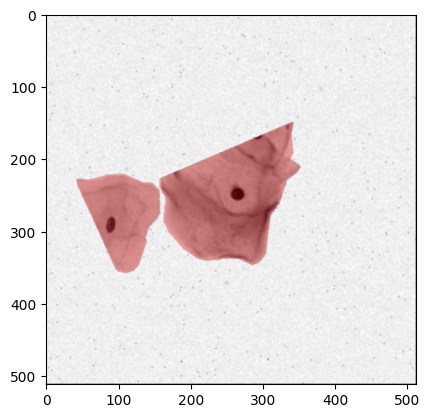

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

this_image = mpimg.imread(f'/content/drive/MyDrive/ISBI_detection/isbi_train/{this_image_name}')
# this_image = mpimg.imread(f'/content/drive/MyDrive/Chromosome/train/{this_image_name}')

plt.imshow(this_image, cmap = 'gray')
plt.imshow(rgba_mask1, alpha = 0.3) # smaller alpha, larger transparency
plt.imshow(rgba_mask2, alpha = 0.3) # smaller alpha, larger transparency
plt.show()

Step2 自定义一个f(x, y) 并画出gradient的图


center_x1:  254.37964335634715 center_y1:  254.4395357702571


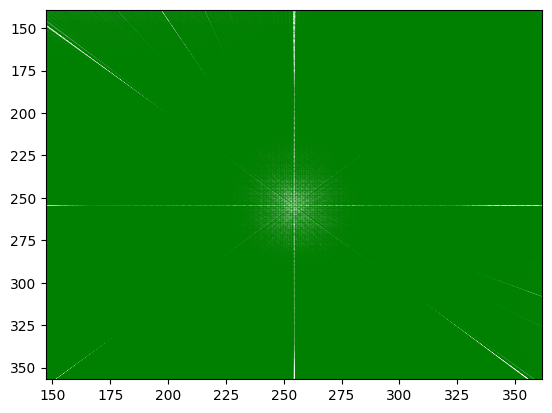

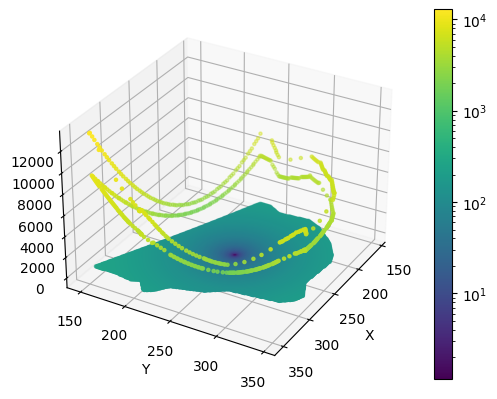

In [ ]:
y1, x1 = np.where(mask1 == 1)
center_x1, center_y1 = np.mean(x1), np.mean(y1) # 找到mask图形的中心点坐标
print('center_x1: ', center_x1, 'center_y1: ', center_y1)
f_values1 = np.zeros_like(mask1, dtype = float)
for i in range(mask1.shape[0]):
  for j in range(mask1.shape[1]):
    if mask1[i, j] == 1:
      f_values1[i, j] = (j - center_x1)**2 + (i - center_y1)**2 # 以f(x, y) = x^2 + y^2，centered at mask center 为例，为每个mask内的像素点计算函数值
      # f_values[i, j] = (j - center_x)**1 + (i - center_y)**2 和 f_values[i, j] = (j - center_x)**2 + (i - center_y)**1 可以做到两个方向

grad_y1, grad_x1 = np.gradient(f_values1) # 计算gradient

Y, X = np.mgrid[0:mask1.shape[0], 0:mask1.shape[1]] #新建一个网络

# #只在mask区域内显示gradient
mask_indices1 = (mask1==1)
X = X[mask_indices1]
Y = Y[mask_indices1]
grad_x1 = grad_x1[mask_indices1]
grad_y1 = grad_y1[mask_indices1]
# step = 1
# X = X[::step]
# Y = Y[::step]
# grad_x = grad_x[::step]
# grad_y = grad_y[::step]

#显示gradient
plt.quiver(X, Y, grad_x1, grad_y1, angles='xy', scale_units='xy', scale=0.0001, color = 'green', alpha = 0.3)
plt.gca().invert_yaxis()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

grad_magnitude1 = np.sqrt(grad_x1**2 + grad_y1**2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 只在mask区域内显示梯度
sc = ax.scatter(X, Y, grad_magnitude1, c=grad_magnitude1, s=5, norm=colors.LogNorm())
# 改变视角
ax.view_init(elev=30, azim=30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(sc)
plt.show()


center_x2:  104.58853118712274 center_y2:  278.01830985915495


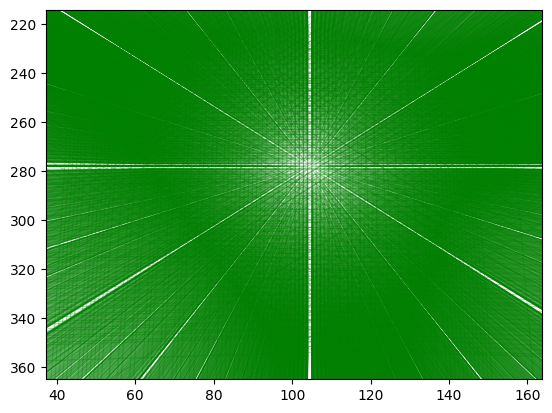

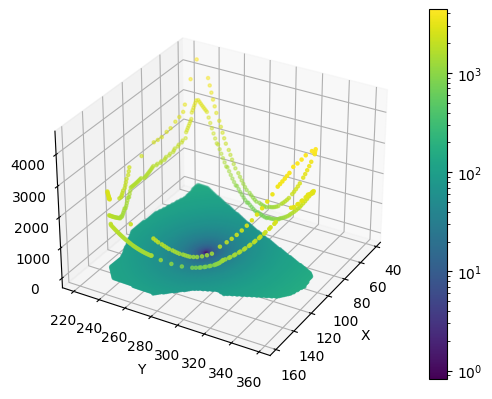

In [ ]:
y2, x2 = np.where(mask2 == 1)
center_x2, center_y2 = np.mean(x2), np.mean(y2) # 找到mask图形的中心点坐标
print('center_x2: ', center_x2, 'center_y2: ', center_y2)
f_values2 = np.zeros_like(mask2, dtype = float)
for i in range(mask2.shape[0]):
  for j in range(mask2.shape[1]):
    if mask2[i, j] == 1:
      f_values2[i, j] = (j - center_x2)**2 + (i - center_y2)**2 # 以f(x, y) = x^2 + y^2，centered at mask center 为例，为每个mask内的像素点计算函数值
      # f_values[i, j] = (j - center_x)**1 + (i - center_y)**2 和 f_values[i, j] = (j - center_x)**2 + (i - center_y)**1 可以做到两个方向

grad_y2, grad_x2 = np.gradient(f_values2) # 计算gradient

Y, X = np.mgrid[0:mask2.shape[0], 0:mask2.shape[1]] #新建一个网络

# #只在mask区域内显示gradient
mask_indices2 = (mask2==1)
X = X[mask_indices2]
Y = Y[mask_indices2]
grad_x2 = grad_x2[mask_indices2]
grad_y2 = grad_y2[mask_indices2]


#显示gradient
plt.quiver(X, Y, grad_x2, grad_y2, angles='xy', scale_units='xy', scale=0.0001, color = 'green', alpha = 0.3)
plt.gca().invert_yaxis()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

grad_magnitude2 = np.sqrt(grad_x2**2 + grad_y2**2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 只在mask区域内显示梯度
sc = ax.scatter(X, Y, grad_magnitude2, c=grad_magnitude2, s=5, norm=colors.LogNorm())
# 改变视角
ax.view_init(elev=30, azim=30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(sc)
plt.show()


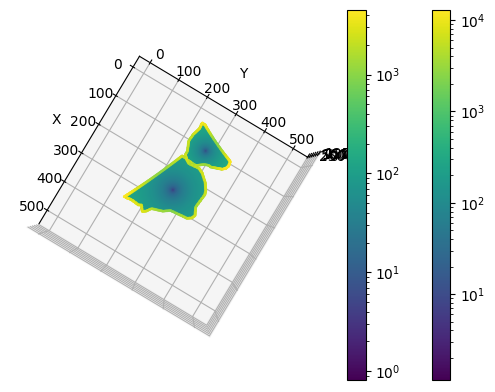

In [ ]:
grad_y1, grad_x1 = np.gradient(f_values1) # 计算gradient
grad_y2, grad_x2 = np.gradient(f_values2)

Y1, X1 = np.mgrid[0:mask1.shape[0], 0:mask1.shape[1]] #新建一个网络
Y2, X2 = np.mgrid[0:mask2.shape[0], 0:mask2.shape[1]]
mask1_indices = (mask1==1)
mask2_indices = (mask2==1)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
grad_magnitude1 = np.sqrt(grad_x1**2 + grad_y1**2)
grad_magnitude2 = np.sqrt(grad_x2**2 + grad_y2**2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 只在mask区域内显示梯度
sc1 = ax.scatter(X1, Y1, grad_magnitude1, c=grad_magnitude1, s=0.5, norm=colors.LogNorm())
sc2 = ax.scatter(X2, Y2, grad_magnitude2, c=grad_magnitude2, s=0.5, norm=colors.LogNorm())
# 改变视角
ax.view_init(elev=90, azim=30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(sc1)
plt.colorbar(sc2)
plt.show()

# f(x, y) = (x - center_x)^2 + (y - center_y)^2在mask的内部是平滑的，也就是说，它的值在mask的内部缓慢地变化。
# 因此，梯度（即函数值的变化率）在mask的内部是很小的，所以在3D图像中看不到明显的梯度。
# 然而，在mask的边缘，函数的值突然从一个非零值变为零，因此梯度在这里是很大的


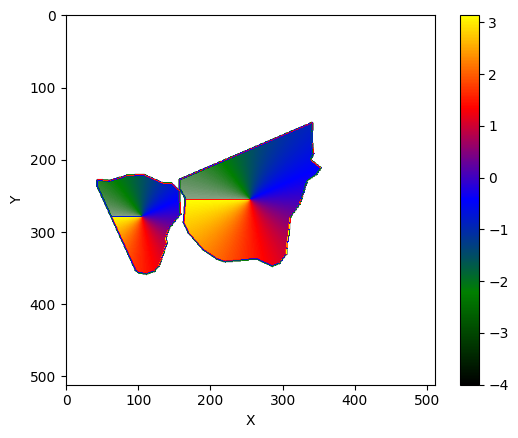

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", [(0,0,0,0), 'green', 'blue', 'red', 'yellow'])

grad_y1, grad_x1 = np.gradient(f_values1)
grad_y2, grad_x2 = np.gradient(f_values2)

threshold = 0.1
# 对梯度大小进行阈值处理
grad_magnitude1[grad_magnitude1 < threshold] = -1
grad_magnitude2[grad_magnitude2 < threshold] = -1

# 计算梯度的方向 # numpy.arctan2函数返回的是从-π到+π的角度，其中正向x轴的方向为0度，正向y轴的方向为90度，负向x轴的方向为180度或-180度，负向y轴的方向为-90度
gradient_direction1 = np.arctan2(grad_y1, grad_x1)
gradient_direction1[grad_magnitude1 == -1] = -4
gradient_direction2 = np.arctan2(grad_y2, grad_x2)
gradient_direction2[grad_magnitude2 == -1] = -4

# 创建一个新的图像
plt.figure()

# 这里使用了hsv颜色映射，它可以将角度映射为颜色
plt.imshow(gradient_direction1, cmap=cmap, alpha = 1)
plt.imshow(gradient_direction2, cmap=cmap, alpha = 1)

# 显示颜色条
plt.colorbar()

plt.xlabel('X')
plt.ylabel('Y')

# 显示图像
plt.show()

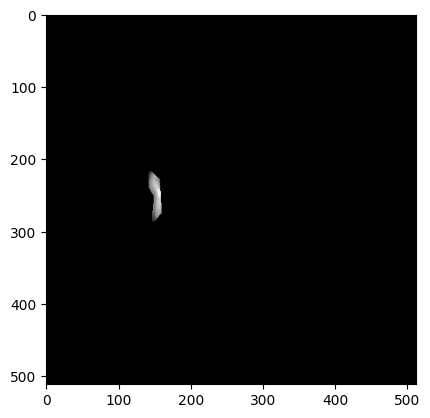

In [ ]:
# 计算梯度的方向
gradient_direction1 = np.arctan2(grad_y1, grad_x1)
gradient_direction2 = np.arctan2(grad_y2, grad_x2)

# 创建一个新的三维数组
gradient_direction_array = np.zeros((512, 512, 3))

# 将两个梯度方向存储到新的三维数组中
gradient_direction_array[:,:,0] = gradient_direction1
gradient_direction_array[:,:,1] = gradient_direction2

# 定义滑动窗口的大小
window_size = 15

# 创建一个新的二维数组，用于存储每个窗口的梯度方向的差异性
diff_array = np.zeros((512-window_size+1, 512-window_size+1))

# 使用滑动窗口计算每个窗口的梯度方向的差异性
for i in range(512-window_size+1):
    for j in range(512-window_size+1):
        window = gradient_direction_array[i:i+window_size, j:j+window_size, :]
        # diff = np.std(window[:,:,0:2], axis=(0,1))  # 计算窗口内的梯度方向的标准差
        if ((grad_x1[i:i+window_size, j:j+window_size] == 0).all() and (grad_y1[i:i+window_size, j:j+window_size]==0).all()) or \
        ((grad_x2[i:i+window_size, j:j+window_size]==0).all() and (grad_y2[i:i+window_size, j:j+window_size]==0).all()):
          continue
        else:
          diff = np.std(window[:,:,1] - window[:,:,0])
          diff_array[i,j] = np.mean(diff)  # 将标准差的平均值存储到差异性数组中

# 归一化差异性数组
diff_array_normalized = (diff_array - np.min(diff_array)) / (np.max(diff_array) - np.min(diff_array))

# 创建一个新的三维数组，用于存储带权重的图像
weighted_image = np.zeros((512, 512, 3))

# 将归一化后的差异性数组作为权重，调整图像的颜色
for i in range(512-window_size+1):
    for j in range(512-window_size+1):
        weighted_image[i:i+window_size, j:j+window_size, :] = diff_array_normalized[i,j]

# 重叠部分会被highlight，但不够明显，手动加一点
if np.logical_and(mask1, mask2).any():
  weighted_image[np.logical_and(mask1, mask2)] += 0.15

# 显示带权重的图像
plt.imshow(weighted_image)
plt.show()

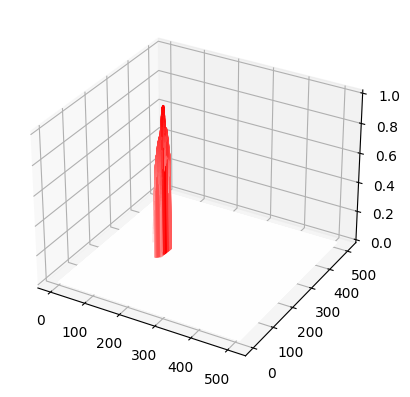

In [ ]:
import cv2
from matplotlib.colors import LinearSegmentedColormap
# 创建一个新的颜色映射，从白色渐变到红色
colors = [(1, 1, 1), (1, 0, 0)]  # 白色到红色
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=100)

# 获取图像的宽度和高度
h, w = weighted_image.shape[:2]

# 创建x, y坐标
x, y = np.meshgrid(np.arange(w), np.arange(h))

# 使用weighted_image作为z坐标
z = np.mean(weighted_image, axis=2)

# 创建一个新的图像窗口
fig = plt.figure()

# 添加一个3D子图
ax = fig.add_subplot(111, projection='3d')

# 使用新的颜色映射绘制3D图像
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cmap(z), shade=False)

# 显示图像
plt.show()

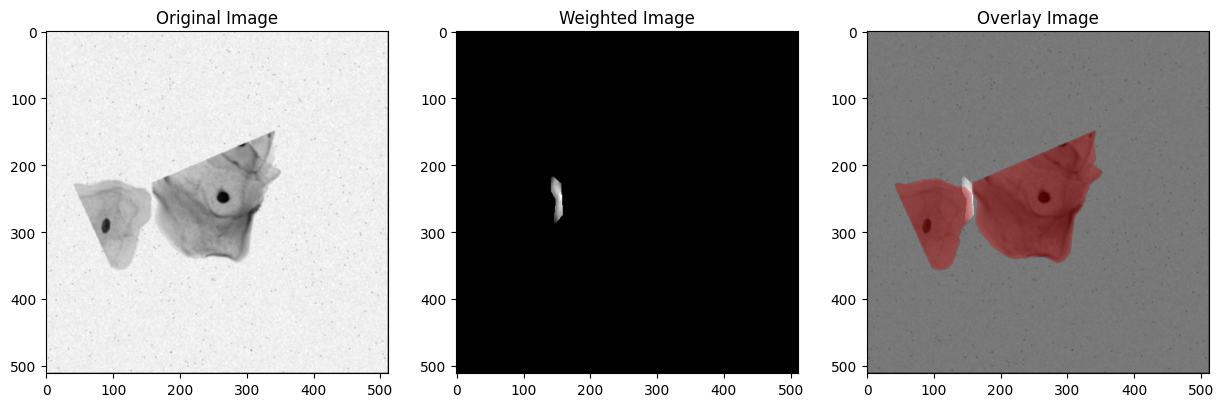

In [ ]:
plt.figure(figsize=(15, 5))

# 创建第一个子图，显示原图
plt.subplot(1, 3, 1)
plt.imshow(this_image, cmap='gray')
plt.title('Original Image')

# 创建第二个子图，显示加权图像
plt.subplot(1, 3, 2)
plt.imshow(weighted_image, cmap='hot')
plt.title('Weighted Image')

# 创建第三个子图，显示原图和加权图像的叠加图像
plt.subplot(1, 3, 3)
plt.imshow(this_image, cmap='gray')
plt.imshow(weighted_image, cmap='hot', alpha=0.5)  # 使用alpha参数来设置加权图像的透明度
plt.imshow(rgba_mask1, alpha = 0.3) # smaller alpha, larger transparency
plt.imshow(rgba_mask2, alpha = 0.3) # smaller alpha, larger transparency
plt.title('Overlay Image')

# 显示图像
plt.show()